# 1. Nominal or One Hot Encoding

In [1]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.DataFrame({
    'color' : ['red','green','blue','red','green','blue']
                  })

In [9]:
df

,color
0,red
1,green
2,blue
3,red
4,green
5,blue


In [12]:
# create an instance for one hot encoder 
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['color']])

In [14]:
import pandas as pd 

In [18]:
encoded_df = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out()) #get_feature_name_out helps to get the column of previous data(encoder)


In [20]:
encoder.get_feature_names_out()

array(['color_blue', 'color_green', 'color_red'], dtype=object)

In [19]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0


In [23]:
pd.concat([df,encoded_df],axis = 1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,red,0.0,0.0,1.0
4,green,0.0,1.0,0.0
5,blue,1.0,0.0,0.0


In [24]:
import seaborn as sns

In [25]:
df1 = sns.load_dataset('tips')

In [26]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
encoded1 = encoder.fit_transform(df1[['sex','smoker','time']])

In [35]:
encoded_df1 = pd.DataFrame(encoded1.toarray(),columns=encoder.get_feature_names_out())

In [32]:
encoder.get_feature_names_out()

array(['sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'time_Dinner',
       'time_Lunch'], dtype=object)

In [37]:
encoded_df1.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0


In [39]:
pd.concat([df1,encoded_df1],axis = 1)

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0,1.0,0.0


# Label and Odinal Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder = LabelEncoder()

In [43]:
df = pd.DataFrame({
    'color' : ['red','green','blue','red','green','blue']
                  })

In [45]:
encoder.fit_transform(df['color'])

array([2, 1, 0, 2, 1, 0])

here label encoder gives the rank according to the alphabetical order

In [46]:
# Ordinal Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
encoder = OrdinalEncoder()

In [50]:
# creating a sample dataframe with odinal variable.
df = pd.DataFrame({
    'size' : ['small','medium','large','medium','large','small']
})

In [53]:
encoder.fit_transform(df[['size']])

array([[2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.]])

# Target guided Ordinal Encoding

In [1]:
import pandas as pd

In [12]:
df = pd.DataFrame({
    'city' : ['London','New york','tokyo','London','New york'],
    'prize' : [350, 282, 310, 210, 250]
})

In [13]:
df

,city,prize
0,London,350
1,New york,282
2,tokyo,310
3,London,210
4,New york,250


In [19]:
# calculating the mean of the prize 
mean_value = df.groupby('city')['prize'].mean().to_dict()

In [20]:
mean_value

{'London': 280.0, 'New york': 266.0, 'tokyo': 310.0}

In [22]:
# replace each value with its mean prize. 
df['encoded_data'] = df['city'].map(mean_value)

In [23]:
df

,city,prize,encoded_data
0,London,350,280.0
1,New york,282,266.0
2,tokyo,310,310.0
3,London,210,280.0
4,New york,250,266.0


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = sns.load_dataset('tips')

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
#calculating the mean of total bills

In [34]:
mean_bill = df.groupby('day')['total_bill'].mean().to_dict()

C:\Users\Pradum Gupta\AppData\Local\Temp\ipykernel_11768\615754428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bill = df.groupby('day')['total_bill'].mean().to_dict()


In [35]:
mean_bill

{'Thur': 17.682741935483868,
 'Fri': 17.15157894736842,
 'Sat': 20.44137931034483,
 'Sun': 21.41}

In [36]:
df['encoded_data'] = df['day'].map(mean_bill)

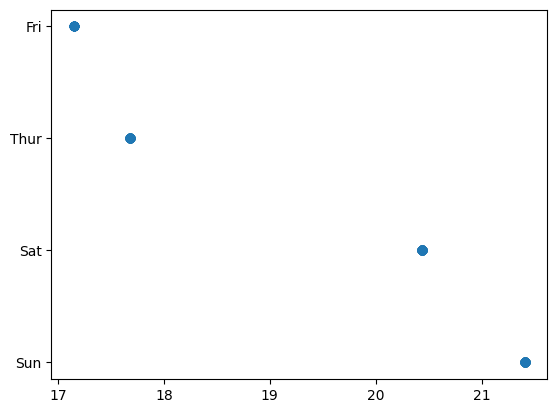

In [49]:
plt.scatter(df['encoded_data'],df['day'])